Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [6]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [7]:
print(df.shape)
df.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

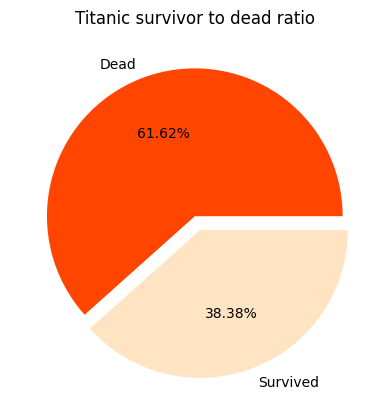

In [18]:
counts = df['Survived'].value_counts()
colors=['orangered', 'bisque']
plt.pie(counts, labels=['Dead', 'Survived'], explode = (0, 0.1), autopct='%1.2f%%', colors=colors)
plt.title('Titanic survivor to dead ratio')
plt.show()

З діаграми видно, що тільки 38% людей залишилися у живих після катастрофи на Титаніку.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


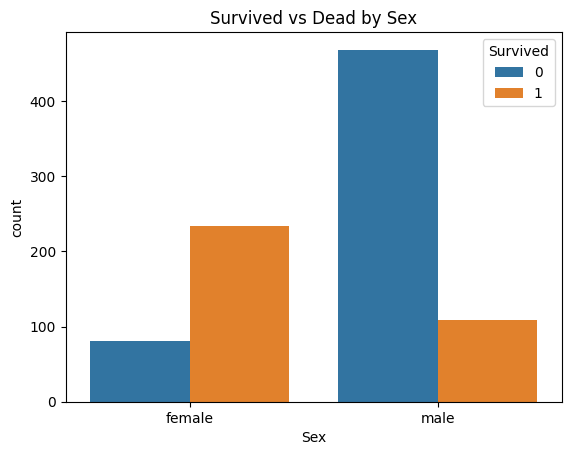

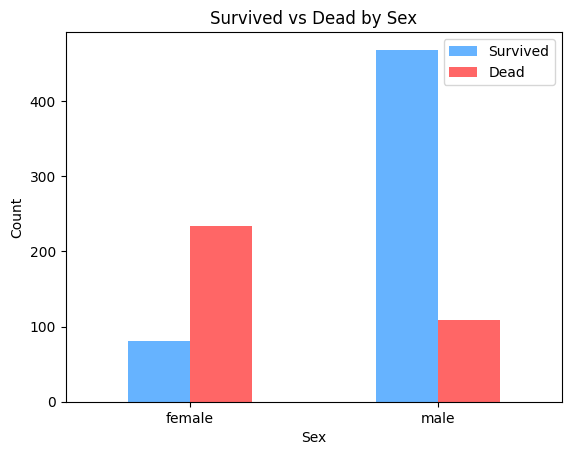

In [9]:
grouped = df.groupby(['Sex', 'Survived'], as_index=False).size()
pivot_table = grouped.pivot(index='Sex', columns='Survived', values='size')

pivot_table.plot(kind='bar', stacked=False, color=['#66b3ff', '#ff6666'])
plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Survived', 'Dead'])
plt.xticks(rotation=0)
plt.show()

З графіку зрозуміло, що білшій кількості чоловіків вдалося вижити. Більшість жінок, на жаль, загинула. Також з графіку видно також, що на кораблі було більше чоловіків аніж жінок.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

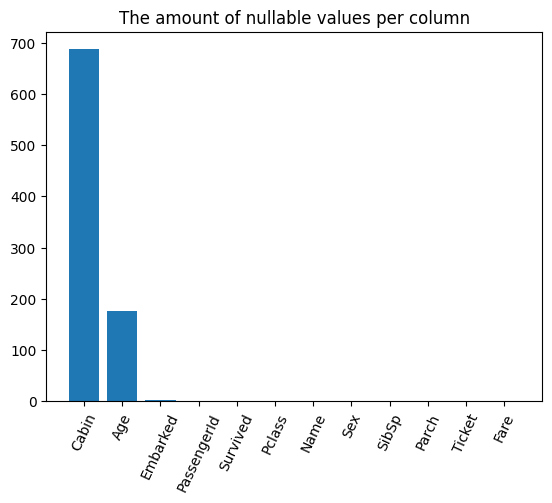

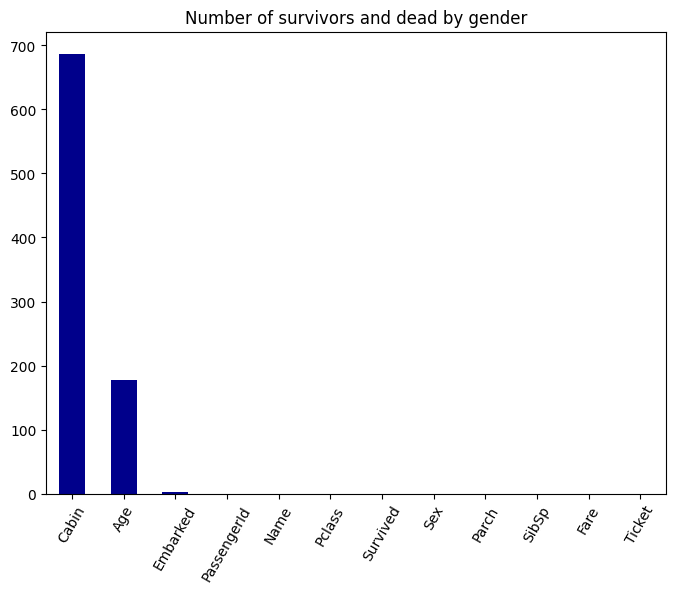

In [10]:
missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

missing_values.plot(kind='bar',  color=['darkblue'], figsize=(8,6))
plt.title('Number of survivors and dead by gender')
plt.xticks(rotation=60)
plt.show()

Найбільше всього пропущених значень має колонка Cabin, яка має містити інформацію про номер кабіни пасажира.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

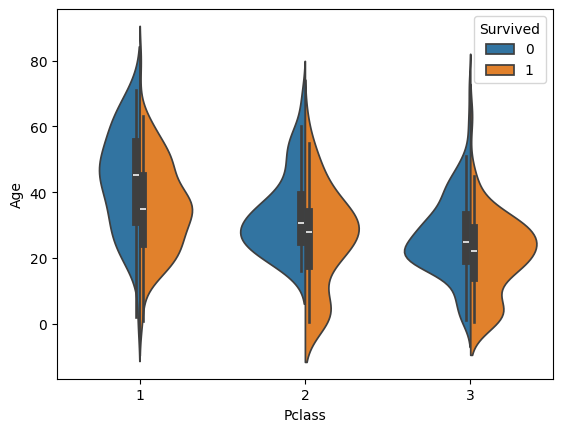

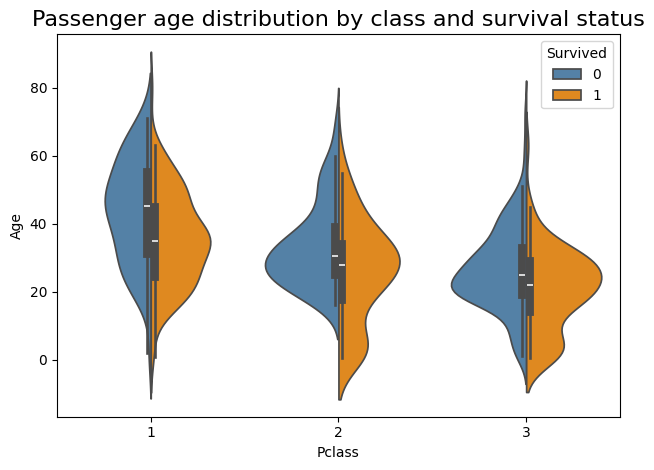

In [11]:
ax = sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, palette=['steelblue', 'darkorange'],split=True)

plt.title('Passenger age distribution by class and survival status', fontsize=16)
plt.tight_layout()
plt.show()

У 1-му класі в середньому було більше старших людей, але загалом тут найбільша вікова різноманітність, порівнюючи з іншими класами.
У 2-му класі пасажири в середньому були приблизно 30 років, нв графіку це гарно видно. У
Пасажири 3-го класу були в середньому були наймолодшими, видно що було більше людей 20-30 років, отже більша концентрація пасажирів молодого віку.
Оцінка виживання, для мене дається трохи складно з графіку


6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


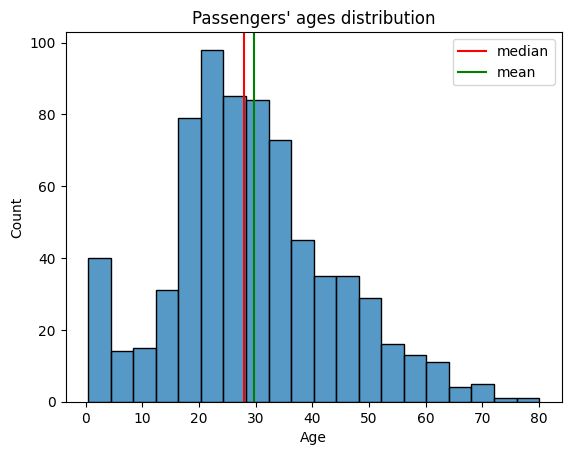

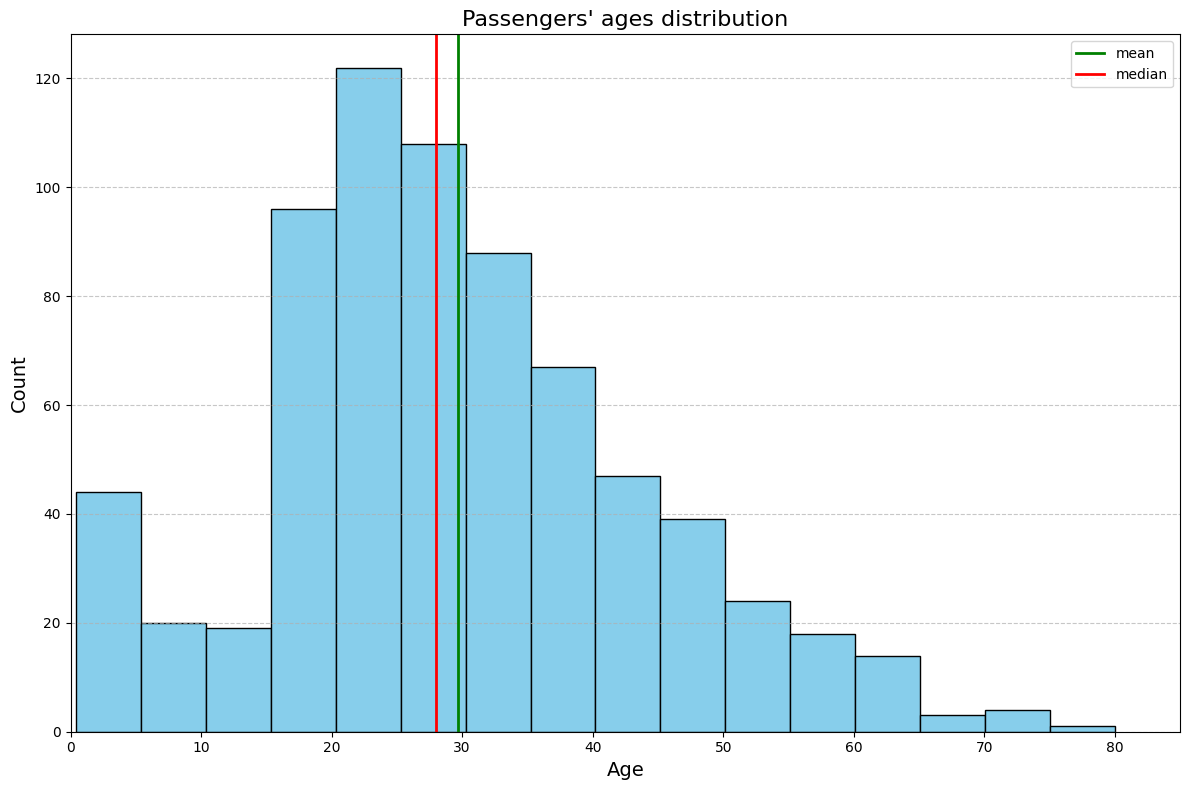

In [29]:
plt.figure(figsize=(12, 8))
plt.hist(df['Age'].dropna(), bins=16, edgecolor='black', color='skyblue')

mean_age = df['Age'].dropna().mean()
median_age = df['Age'].dropna().median()

plt.axvline(mean_age, color='green', linestyle='-', linewidth=2, label='mean')
plt.axvline(median_age, color='red', linestyle='-', linewidth=2, label='median')

plt.title("Passengers' ages distribution", fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlim(0, 85)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Найбільше всього було пасажирів у віці 20-30 років, також на кораблі була велика кількість дітей 40+ осіб, і мало пасижирів похилого віку після 65 років.
Також помітний різкий стрибок осіб доросліше 15 років, тобто було мало пасажирів віку 5-15 років, а вже кількість осіб 15-20 років більша у приблизно у 2,5 рази.





7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи впливає порт посадки на вартість квитка та клас комфорту?

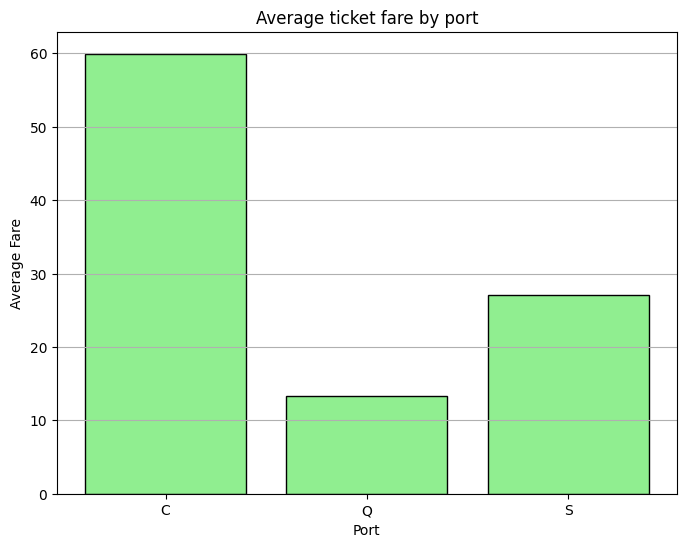

In [42]:
df = df.dropna(subset=['Embarked'])

fare_by_port = df.groupby('Embarked', as_index=False)['Fare'].mean()

plt.figure(figsize=(8, 6))
plt.bar(fare_by_port['Embarked'], fare_by_port['Fare'], color="lightgreen", edgecolor='black')
plt.title('Average ticket fare by port')
plt.xlabel('Port')
plt.ylabel('Average fare')
plt.grid(axis='y')
plt.show()



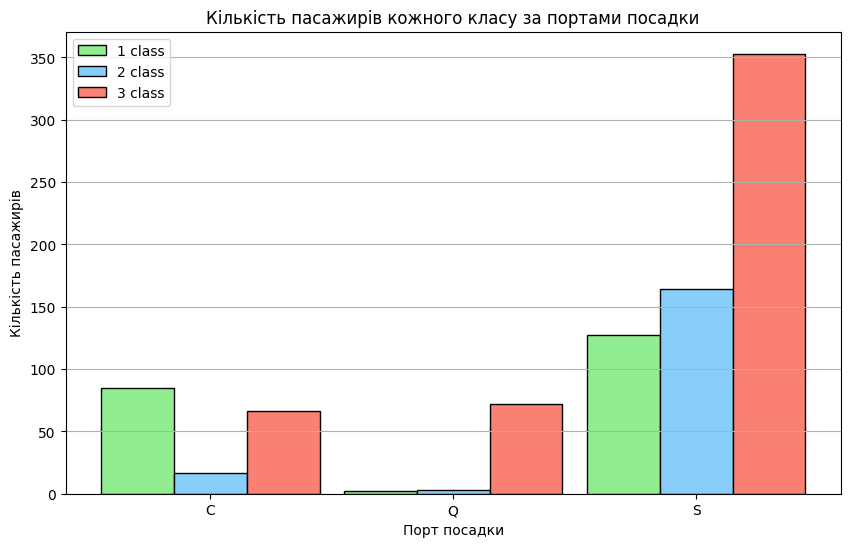

In [43]:
pclass_by_port = df.groupby(['Embarked', 'Pclass'], as_index=False)['PassengerId'].count()
pclass_pivot = pclass_by_port.pivot(index='Embarked', columns='Pclass', values='PassengerId').fillna(0)

ports = pclass_pivot.index
x = range(len(ports))

width = 0.2

plt.figure(figsize=(10, 6))
plt.bar([i - width for i in x], pclass_pivot[1], width=width, label='1 class', color='lightgreen', edgecolor='black')
plt.bar(x, pclass_pivot[2], width=width, label='2 class', color='lightskyblue', edgecolor='black')
plt.bar([i + width for i in x], pclass_pivot[3], width=width, label='3 class', color='salmon', edgecolor='black')

plt.xticks(x, ports)
plt.title('Number of passengers of each class by port of embarkation')
plt.xlabel('Port')
plt.ylabel('Number of passangers')
plt.legend()
plt.grid(axis='y')
plt.show()

Отже, з першого графіку зрозуміло, що порт "С" мав сердню вартість квитка більшу і з нього переважно сідали 1 класу аніж інші.
Порт "S" є найпопулярнішим, адже більша кількість пасажирів сідала саме через нього. Але в ньому переважали пасажири 3-го класу, хоча і 1-го і 2-го було теж достатньо.
Через порт "Q" сідали майже тільки пасажири 3-го класу, інших класів було дуже мало.

# Вітаю! Ви велика молодець, що впоралась. Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

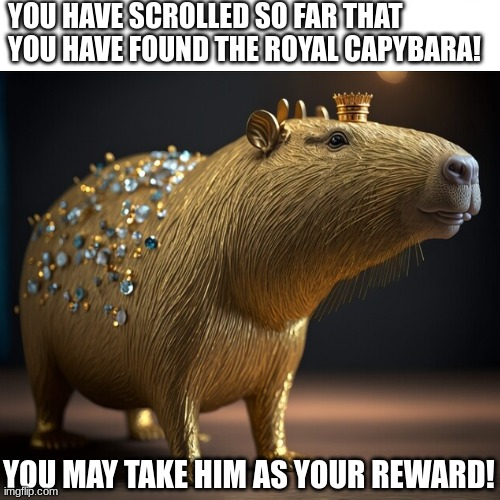